<a href="https://colab.research.google.com/github/CodeInTheHorizon/Python_ML_Practice-/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import scipy as sp


In [5]:
regular_data= np.array([10,20,30,40,50])
print(f'mean of regular data: {regular_data.mean()}')

mean of regular data: 30.0


In [6]:
outlier_data= np.array([10,20,30,40,500])
print(f'mean of outlier data: {outlier_data.mean()}')


mean of outlier data: 120.0


In [7]:
from scipy import stats
import numpy as np

z_scores= np.abs(stats.zscore(outlier_data))
outliers = outlier_data[z_scores >3]

In [8]:
Q1 = np.percentile(outlier_data, 25)
Q3 = np.percentile(outlier_data, 75)
IQR = Q3 - Q1
outliers= outlier_data[((outlier_data < (Q1-1.5* IQR)) | (outlier_data > (Q3+1.5*IQR)))]

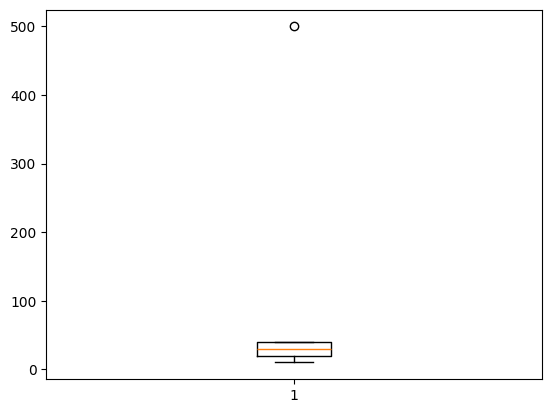

In [9]:
import matplotlib.pyplot as plt
#boxplot
plt.boxplot(outlier_data)
plt.show()


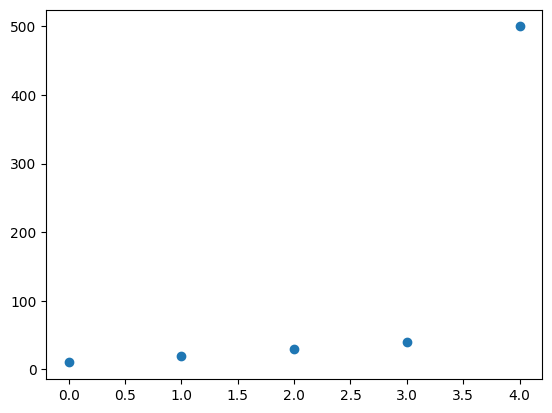

In [11]:
#scatter plot
plt.scatter(range(len(outlier_data)),outlier_data)
plt.show()

outliers using z-scores: []
outliers using IQR: []


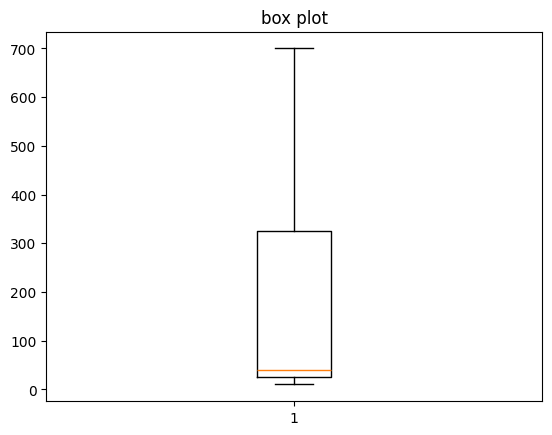

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest

#generate data with outliers
data= np.array([10,20,30,40,50,600,700])

#detect outliers using z-score
z_scores= np.abs(stats.zscore(data))
print(f'outliers using z-scores: {data[(z_scores >3)]}')

#detect outliers using IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data,75)

IQR = Q3-Q1

print(f'outliers using IQR: {data[((data< (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR)))]}')


#visulize outliers using boxplot
plt.boxplot(data)
plt.title('box plot')
plt.show()

#using winsorize
winsorized_data= winsorize(data, limits=[0.05,0.05])


In [5]:
print(f'winsorized data: {winsorized_data}')
#handle outliers using Isolation forest
clf= IsolationForest(contamination=0.2)
pred = clf.fit_predict(data.reshape(-1,1))
data_no_outliers = data[pred==1]
print(f'data after removing outliers using isolation forest: {data_no_outliers}')

winsorized data: [ 10  20  30  40  50 600 700]
data after removing outliers using isolation forest: [10 20 30 40 50]


In [6]:
#label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#lets create a simple data
data= {'name':['john','aliya','aman','dhruv','nemish','kshitij'],'sex': ['male','female','male','male','male','male'], 'city':['bombay','hyderabad','gwalior','seedhi','ratlam','satna']}


In [7]:
df=pd.DataFrame(data)
#one hot encode the 'sex' column
df_one_hot = pd.get_dummies(df, columns=['sex'], prefix='sex')
#label encode the 'city column'
le = LabelEncoder()
df['city_encoded']= le.fit_transform(df['city'])

#display the original and modified dataframes
print('original dataframe:')
print(df)
print('dataframe after one hot encoding:')
print(df_one_hot)
print('dataframe after label encoding:')
print(df)

#handle high cardinality and rare categories in 'name' column
counts =df['name'].value_counts()
others =  counts[counts<2].index
df['name']= df['name'].replace(others,'others')

print(f'dataframe after handling high cardinality and rare categories in name column: {df}')

print( f'dataframe after one hot encoding sex column and label encoding city :{df_one_hot}')
df= pd.DataFrame(data)






original dataframe:
      name     sex       city  city_encoded
0     john    male     bombay             0
1    aliya  female  hyderabad             2
2     aman    male    gwalior             1
3    dhruv    male     seedhi             5
4   nemish    male     ratlam             3
5  kshitij    male      satna             4
dataframe after one hot encoding:
      name       city  sex_female  sex_male
0     john     bombay       False      True
1    aliya  hyderabad        True     False
2     aman    gwalior       False      True
3    dhruv     seedhi       False      True
4   nemish     ratlam       False      True
5  kshitij      satna       False      True
dataframe after label encoding:
      name     sex       city  city_encoded
0     john    male     bombay             0
1    aliya  female  hyderabad             2
2     aman    male    gwalior             1
3    dhruv    male     seedhi             5
4   nemish    male     ratlam             3
5  kshitij    male      satna     